# DATAFEST DATATHON SUBMISSION

# Team Name: NSK.ai

In [1]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
#Load train dataset
train=pd.read_csv(r"C:\Users\user\Downloads\train_datafest.csv")
test=pd.read_csv(r'C:\Users\user\Downloads\test_datafest.csv')

In [3]:
# displaying all columns
pd.set_option('display.max_columns', None)

In [4]:
#Statistical Description of the Dataset
train.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


In [5]:
train.shape

(12516, 21)

In [6]:
train.duplicated().sum()

0


# Data Cleaning

In [7]:
#Checking for null values
print(" Number of Null Values:", train.isna().sum().sum())

 Number of Null Values: 0


In [8]:
print(" Number of Duplicated Rows:", train.duplicated().sum())

 Number of Duplicated Rows: 0


In [9]:
train.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [10]:
# consistency check for the object column
for x in train.columns:
    if train[x].dtype == 'object':
        print(train[x].unique())

['bi-weekly' 'semi-monthly' 'weekly' 'monthly']


From the above it can be seen that our data is clean since it contains no null values nor repeated rows or columns. We proceed to checking the data types of each column

In [11]:
#Checking datatypes of columns
train.dtypes

Entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

The columns 'home_owner' and 'has_debt' are categorical columns hence should be represented as such.

In [12]:
train['home_owner'] = train.home_owner.astype('category')
train['has_debt'] = train.has_debt.astype('category')

In [13]:
#Checking for imbalance in the dataset
train['e_signed'].value_counts()

1    6766
0    5750
Name: e_signed, dtype: int64

It can be seen above that the dataset is fairly balanced. The positive class makes up 54% of the target column while the negative class makes up 46%

# Exploratory Data Analysis

In [14]:
#creating a list of all columns excluding the target column
cols = list(train.columns)
cols.remove('e_signed')

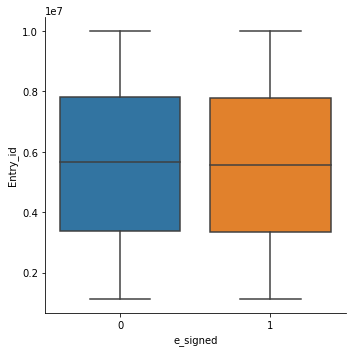

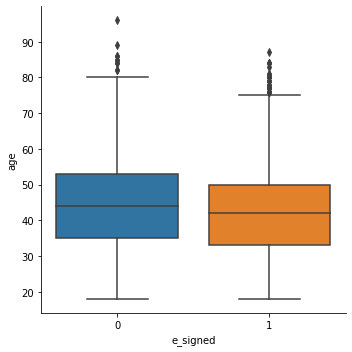

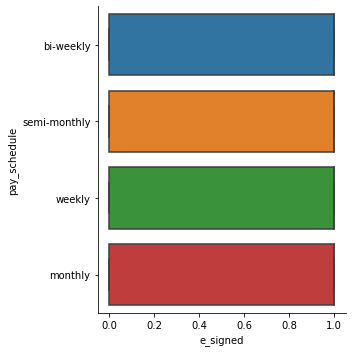

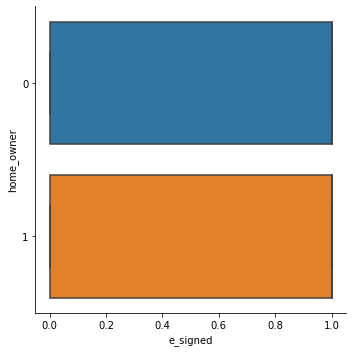

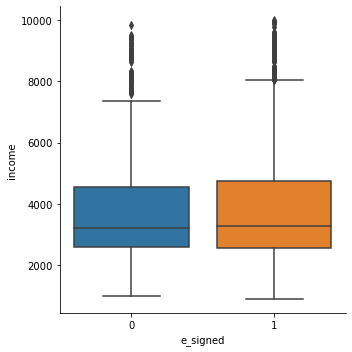

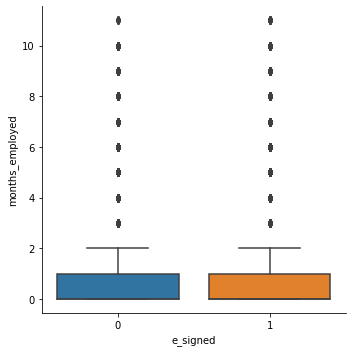

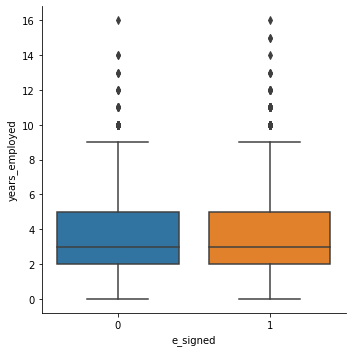

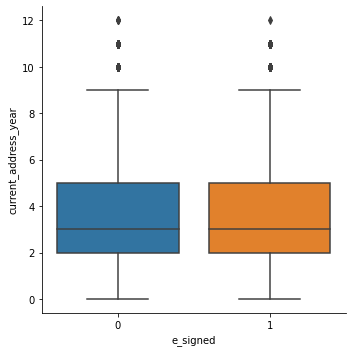

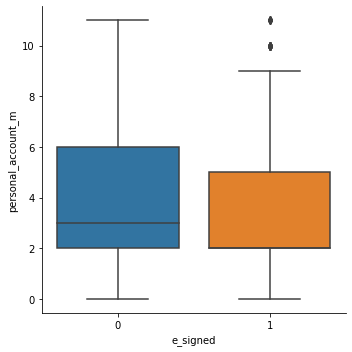

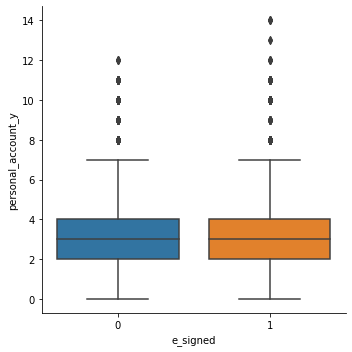

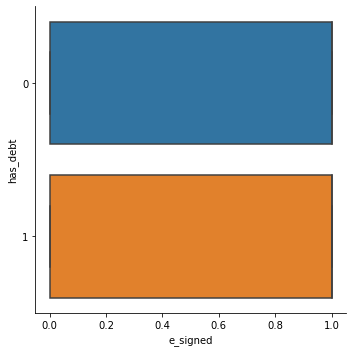

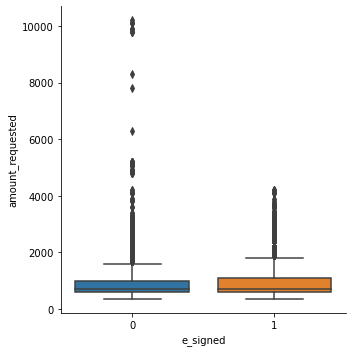

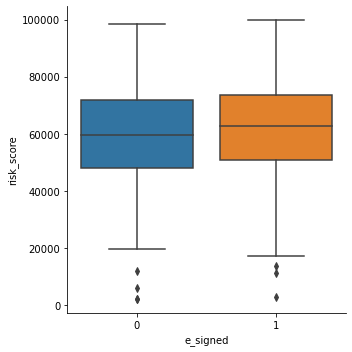

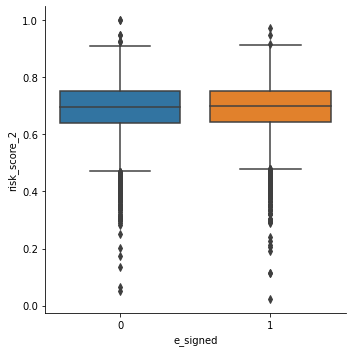

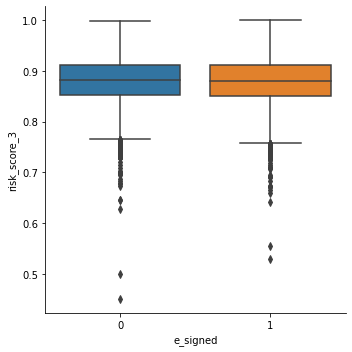

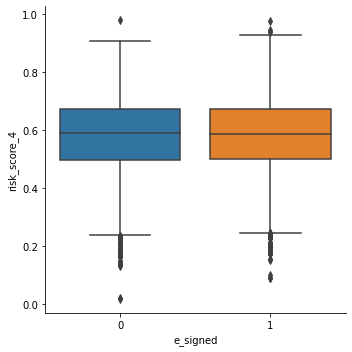

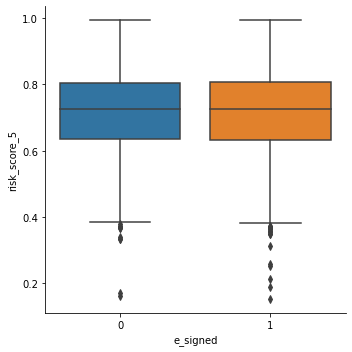

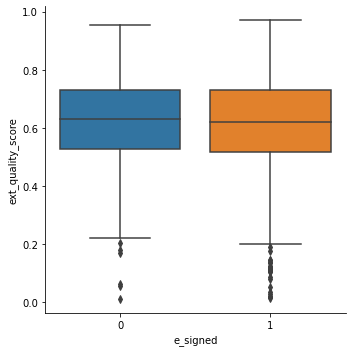

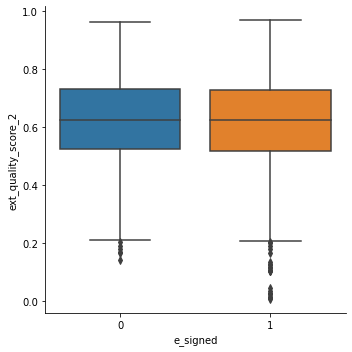

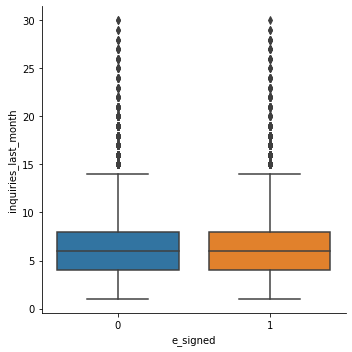

In [15]:
# getting a box plot for each feature with the target on the x axis
for col in cols:
    sns.catplot(x ='e_signed', y = col, kind = 'box', data = train)

Observations
1. We have lesser age distribution for those who were lent money.
2. The months employed and year employed could be made one
2. The income category distribution is higher for those who were lent but we have different schedule for the salaries, so we have to take that into account.
3. Personal account_m seems to be lower for those who were lent but that with the year column seem to be the same, maybe I could convert it to months only.
4. The distribution for amount_requested seems to be higher for those who were lent.
5. The risk score is higher for those who were lent. It's value goes from 0 - 100000 so it seems we can make it from 0-1 as the rest.

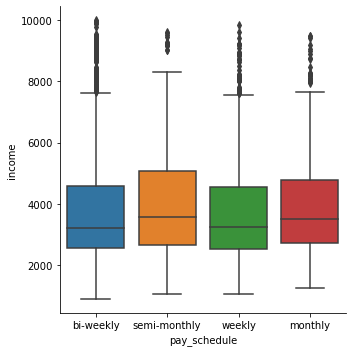

In [16]:
#A box plot of pay schedule with income
sns.catplot(x ='pay_schedule', y='income', data = train, kind = 'box')

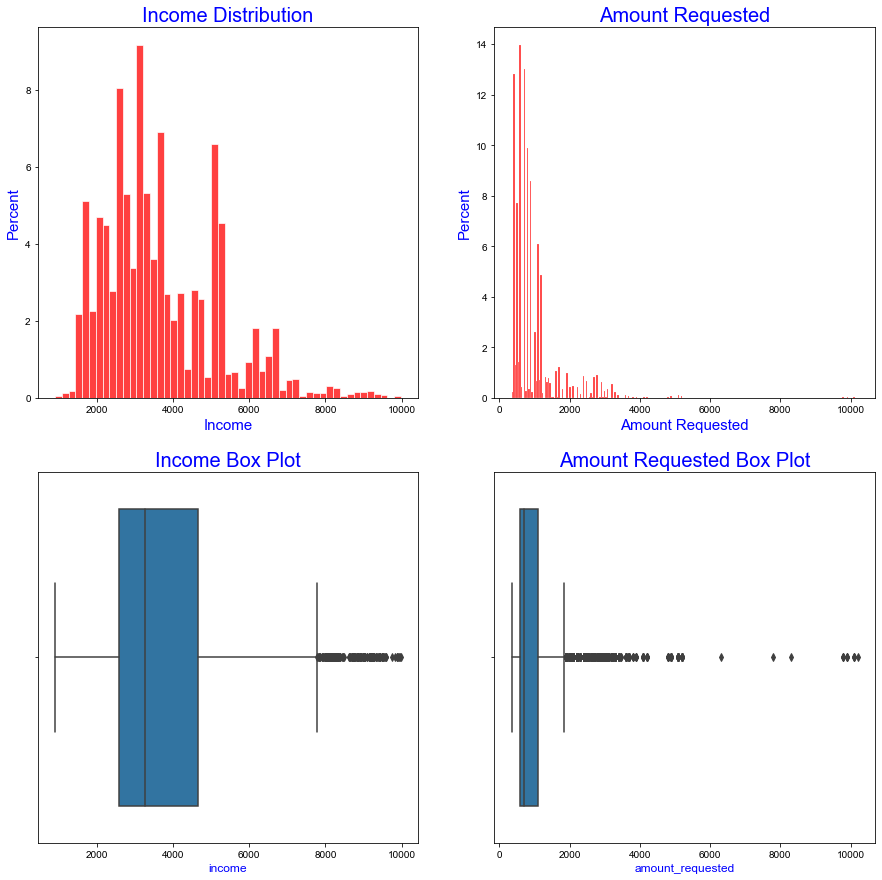

In [20]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.set_style("darkgrid")

# Income Distribution
ax[0,0].set_title('Income Distribution',size=20,color="b")
ax[0,0].set_xlabel('Income',size=15,color='b');ax[0,0].set_ylabel("Percent",size=15,color="b")
sns.histplot(train.income,ax=ax[0,0],color="r",stat="percent")

ax[1,0].set_title('Income Box Plot',size=20,color="b")
ax[1,0].set_xlabel('Income',size=12,color="b");
sns.boxplot(x=train.income,ax=ax[1,0])

# Amount Requested
ax[0,1].set_title('Amount Requested',size=20,color="b")
ax[0,1].set_xlabel('Amount Requested',size=15,color="b");ax[0,1].set_ylabel("Percent",size=15,color="b")
sns.histplot(train.amount_requested,ax=ax[0,1],color="r",stat="percent")

ax[1,1].set_title('Amount Requested Box Plot',size=20,color="b")
ax[1,1].set_xlabel('Amount Requested',size=12,color="b");
sns.boxplot(x=train.amount_requested,ax=ax[1,1])

plt.show()

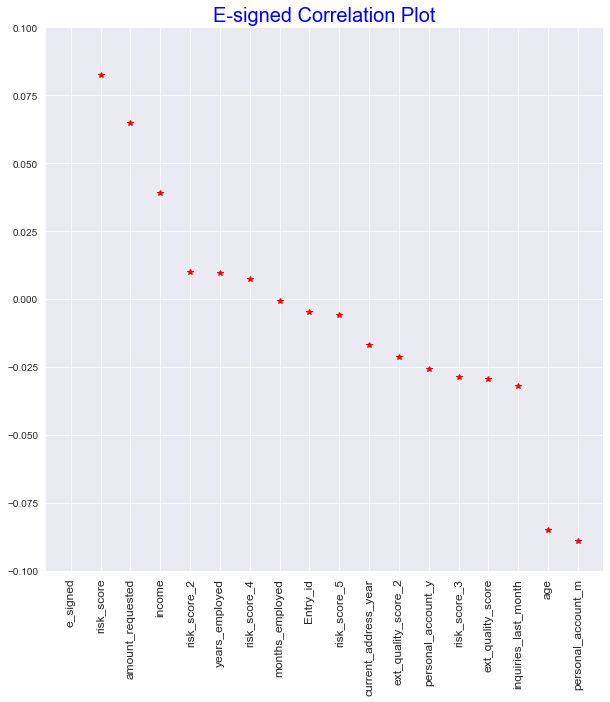

In [21]:
ecorr=train.corr().e_signed.sort_values(ascending=False)
# E Signed Correlation Plot
plt.figure(figsize=(10,10))
plt.title("E-signed Correlation Plot",size=20,color="b")
sns.set_style("darkgrid")
plt.plot(ecorr,"r*")
plt.ylim([-0.1,0.1])
plt.xticks(rotation=90,size=12);
plt.show()

The plot Above shows the Pearson Corrletation between E-signed and other features in descending order. It can be seen that features like risk score and amount requested are highly correlated with the target

We will Visualize some feaures that correlate more with the Target e_signed for probable insights

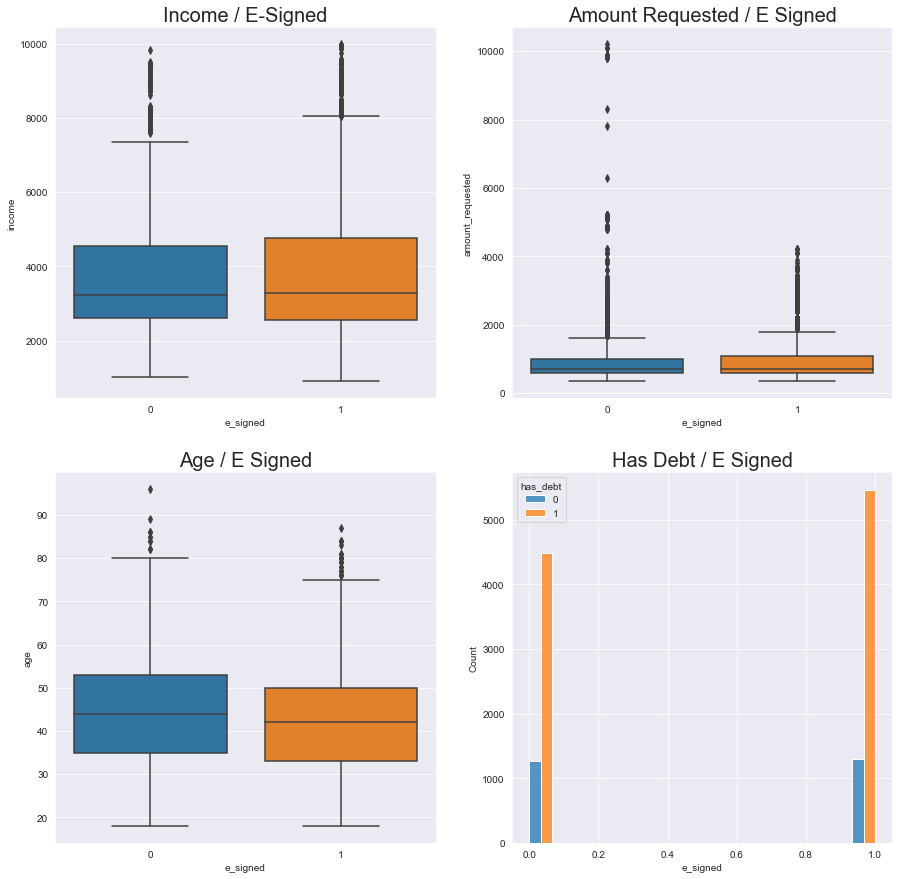

In [22]:
# Understanding the Number of People
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.set_style("darkgrid")

# income e-signed
ax[0,0].set_title('Income / E-Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.income,ax=ax[0,0])

# Amount Requested E-Signed
ax[0,1].set_title('Amount Requested / E Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.amount_requested,ax=ax[0,1])

# Age E-Signed
ax[1,0].set_title('Age / E Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.age,ax=ax[1,0])

# Has Debt E Signed
ax[1,1].set_title('Has Debt / E Signed',size=20)
sns.histplot(x=train.e_signed,hue=train.has_debt,ax=ax[1,1],multiple="dodge")

plt.show()

The Cell Above shows the Variation of select Features with the target label E-signed. `Income / E-Signed ` Shows that both debts request accepted (1) and those rejected (1) has same Income distribution. same with other features. 

# Feature Creation/ Engineering

STEP 1: CREATION OF NEW COLUMN 'pay_times_per_year'
    
The column 'pay_schedule' indicates the frequency of payment. There are 52 weeks in a year and 12 months in a year, hence:

Bi-Weekly == 26 payments in a year

Weekly == 52 payments in a year

Semi-Monthly == 24 payments in a year

Monthly == 12 payments in a year

This will be the basis of creation of the new column which wil represent the number of payments recieved by a unique user in a year.

In [23]:
# mapping the pay schedule to numeric values
mapp = {'bi-weekly':26, 'semi-monthly':24, 'weekly':52, 'monthly':12}
train['pay_times_per_year'] = train.pay_schedule.map(mapp) 

STEP 2:

Since we now have the number of payments per year, we can compute the number of payments per month

In [24]:
# Based on pay schedule how often are they paid in a month ?
train['pay_times_per_month'] = train['pay_times_per_year']/12

STEP 3:

It can be observed that we have a column indicating the number of months employed and another indicating number of years employed. Using these two values, we can compute the total number of months employed since 1 year = 12 months 

In [25]:
# total months they've been working
train['total_month'] = (train['months_employed'])+(train['years_employed']*12)


In [26]:
train['total_month'].value_counts().sort_index()
# we have 4 people who haven't worked up to a month

0       4
1      18
2      36
3      37
4      20
       ..
178     1
184     1
189     1
194     1
201     1
Name: total_month, Length: 162, dtype: int64

STEP 4:
    
Taking a cue from step 3, we can compute the total number of months a person had a personal account 

In [27]:
# combining the personal account features
train['total_personal_account_year'] = (train['personal_account_m']/12)+train['personal_account_y']


In [ ]:
def per_month(val):
    # trying to get just one month income so if total_month > 1 return 1
    if val >=1:
        return 1
    else:
        return val

STEP 5:

We can then compute the income for each unique user per month. The idea behind this is that the 'income' column represents the amount payed to a user at the end of each payment period represented in the 'pay_scedule' column. For example, if we have a value of 3000 in the 'income' column and a value of 'bi-weekly' in the 'pay_schedule' column, we can compute his earnings per month as 3000*2 (since he is being payed bi-weekly). But since we have already extracted the number of pay times per month, we can work with that.

In [29]:
#Their income for a month
train['one_month_worth'] = train['income']*train['total_month'].map(per_month)*train['pay_times_per_month']


STEP 6:
    
Next we can combine the risk scores in the manner shown below

In [30]:
#combining all risk scores
train['risk_score_sum'] = (train['risk_score']-train.risk_score.min())/(train.risk_score.max()-train.risk_score.min()) +  train['risk_score_2'] + train['risk_score_3'] + train['risk_score_4']+ train['risk_score_5']
 

STEP 7:
    
Drop some columns that have weak correlation with the target 

In [31]:
# columns to drop
drop = ['personal_account_m', 'personal_account_y', 'Entry_id', 'pay_schedule', 'months_employed', 'years_employed',
       'pay_times_per_year', 'pay_times_per_month']

In [ ]:
train_ = train.copy().drop(drop, axis = 1)

We define a function that cleans the test dataset in the same manner we did for the train dataset

In [32]:
def Clean(df):
    df['pay_times_per_year'] = df.pay_schedule.map(mapp)
    df['home_owner'] = df.home_owner.astype('category')
    df['has_debt'] = df.has_debt.astype('category')
    df['pay_times_per_month'] = df['pay_times_per_year']/12
    df['total_month'] = (df['months_employed'])+(df['years_employed']*12)
    df['total_personal_account_year'] = (df['personal_account_m']/12)+df['personal_account_y']
    df['one_month_worth'] = df['income']*df['total_month'].map(per_month)*df['pay_times_per_month']
    df['risk_score_sum'] = (df['risk_score']-df.risk_score.min())/(df.risk_score.max()-df.risk_score.min()) +  df['risk_score_2'] + df['risk_score_3'] + df['risk_score_4']+ df['risk_score_5']

    df.drop(drop, axis=1, inplace= True)
    return df

In [ ]:
clean_test = Clean(test)

In [36]:
X = train_.drop('e_signed', axis=1)
y = train.e_signed

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The Model building and tuning was left out of this notebook. The final model that we used was gradient boosting model with tuned hyperparameters. We did not have enough time to re-tune the model and attach it here because of time expense. 

# THANK YOU DATAFEST!